In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import itertools
import math

%matplotlib inline

4.1 Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).

In [2]:
N = 10

for i in range(N):
    x = random.randint(0, 36)
    print(f'выпало {x}')

выпало 1
выпало 2
выпало 18
выпало 31
выпало 5
выпало 6
выпало 1
выпало 22
выпало 19
выпало 25


4.2.1 Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере подбрасывания монетки

In [3]:
t, l = 0, 0
N = 100

for i in range(N):
    x = random.randint(1, 10)
    if x <= 5:
        t += 1
    else:
        l += 1
        
print(f'выпало орлов {t}, выпало решек {l}')
print(f'Сумма вероятностей всех событий дает единицу, {t} + {l} = {t + l},\n'
      f'{t + l} / {N} = 1')


выпало орлов 54, выпало решек 46
Сумма вероятностей всех событий дает единицу, 54 + 46 = 100,
100 / 100 = 1


4.2.2 На конфетной фабрике собирают подарки к Новому Году из n=10 видов конфет. Берут примерно по M=100 г конфет каждого вида (но точно не получается, а выходит плюс-минус m, напр. 95...105 г). Т.е. выйдет вес всего подарка 1 кг плюс-минус накопленная погрешность. Всего собирают N=10000 подарков. Надо построить гистограмму распределения веса подарка. Ну и при желании- поиграться с параметрами N,n,M,m.

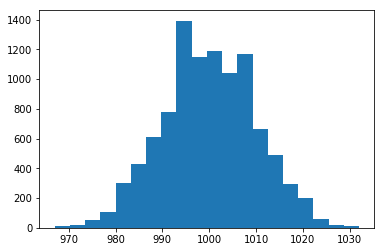

In [4]:
random_sum = []
N = 10000
n = 10
M = 100
m = 5
for i in range(N):
    sum_ = 0
    for j in range(n):
        x = random.randint(M - m, M + m)        
        sum_ += x
    random_sum.append(sum_)
        
plt.hist(random_sum, bins=20);

4.3.1 Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) 
и сравните результаты.

In [5]:
def binomial(n, k, p):    
    C = math.factorial(n)/(math.factorial(n - k) * math.factorial(k))
    value = C * p**k * (1 - p)**(n - k)
    return value

In [6]:
print('истинная вероятность', binomial(4, 2, 0.5))

k, n = 0, 10000
a = np.random.randint(0, 2, n)
b = np.random.randint(0, 2, n)
c = np.random.randint(0, 2, n)
d = np.random.randint(0, 2, n)
x = a + b + c + d
for i in range(0, n):
    if x[i] == 2:
        k = k + 1
print(k, n, k/n)

истинная вероятность 0.375
3747 10000 0.3747


4.3.2 Повторите расчеты, взяв другие значения n и k.

In [7]:
print('истинная вероятность', binomial(6, 4, 0.5))

k, n = 0, 10000
a = np.random.randint(0, 2, n)
b = np.random.randint(0, 2, n)
c = np.random.randint(0, 2, n)
d = np.random.randint(0, 2, n)
e = np.random.randint(0, 2, n)
f = np.random.randint(0, 2, n)
x = a + b + c + d + e + f
for i in range(0, n):
    if x[i] == 4:
        k = k + 1
print(k, n, k/n)

истинная вероятность 0.234375
2347 10000 0.2347


4.4 Повторите расчеты, взяв другие значения n и k.

In [8]:
for p in itertools.product("011",repeat=3):
    print(''.join(p))

000
001
001
010
011
011
010
011
011
100
101
101
110
111
111
110
111
111
100
101
101
110
111
111
110
111
111


In [9]:
for p in itertools.permutations("6545",3):
    print(''.join(str(x) for x in p))

654
655
645
645
655
654
564
565
546
545
556
554
465
465
456
455
456
455
565
564
556
554
546
545


In [10]:
for p in itertools.combinations("0143",3):
    print(''.join(p))

014
013
043
143


In [11]:
for p in itertools.product("04",repeat=2):
    print(''.join(p))   

00
04
40
44


0.6668390831704795 0.16142775304263687
0.6668390831704789 0.16142775304263726


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


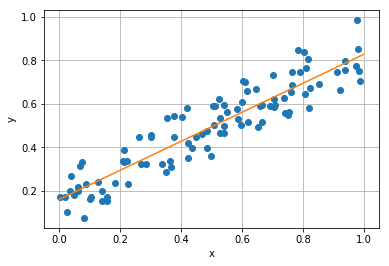

In [12]:
n = 100
r = 0.7
x = np.random.rand(n)
y = r*x + (1 - r)*np.random.rand(n)
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

a = (np.sum(x)*np.sum(y) - n*np.sum(x*y))/(np.sum(x)*np.sum(x) - n*np.sum(x*x))
b = (np.sum(y) - a*np.sum(x))/n

A = np.vstack([x, np.ones(len(x))]).T
a1, b1 = np.linalg.lstsq(A, y)[0]
print(a, b)
print(a1, b1)
plt.plot([0, 1], [b, a + b])
plt.show()

4.5 Дополните код расчетом коэффициента корреляции x и y

In [13]:
R = ((x - x.mean()) * (y - y.mean())).sum() / np.sqrt((((x - x.mean())**2).sum() * ((y - y.mean())**2).sum()))
print(R)

0.9234983582410929


Мачта освещения футбольного стадиона содержит полотно из 20 рядов по 50 ламп, т.е. всего 1000 ламп.
Вероятность "перегорания" каждой лампы Р = 0.001 (за 2 часа работы, пока идет матч)
перед началом матча все лампы исправны, по нормативам игру можно проводить, должно работать не менее 90% ламп 
достаточна ли такая надежность ламп для проведения матча (т.е. требуется, чтобы до конца игры перегорело не более 100 ламп)?


Усложнения:
- Какие лампы (с каким максимальным параметром Р) необходимо купить, чтобы можно было проводить подряд несколько игр на протяжении 10 часов без выключения мачт?
- Как изменятся ответы, если есть еще вероятность перегрева и отказа проводки к каждому из ряду ламп Р20=10е-5? (т.е. одновременного отказа 20 лемп сразу)
Примечание: задача из реальной жизни; возможно, она недоформулирована, если так - надо додумать самому


Будем считать, что если из N независимо проведенных матчей не более 2% не состоятся, то лампы достаточно надежны

In [14]:
n = 20 # количество рядов
m = 50 # количество лампочек в ряду
p = 0.001 # вероятность выхода из строя одной лампочки
total = n * m # всего лампочек


# находим вероятность того, что из строя за 2 часа работы выйдут 100 лампочек и матч не состоится
p_100 = 1

for i in range(100):
    p_100 *= p * (total - i)

In [15]:
def check_match(n, p):
    '''Функция возвращает, сколько матчей не стостоится из n матчей при p вероятности'''
    result = []

    for i in range(n):
        x = random.uniform(0, 1000)
        if x < p * 1000:           
            result.append(1)
        else:
            result.append(0)

    return sum(result)

In [16]:
def monte_carlo(N, C, p):
    '''функция  возвращает количество неудачных результатов
        при N испытаний по C матчей при p вероятности'''
    N = range(N)
    fails = []

    for _ in N:    
        fails.append(check_match(C, p))
    
    return N, fails

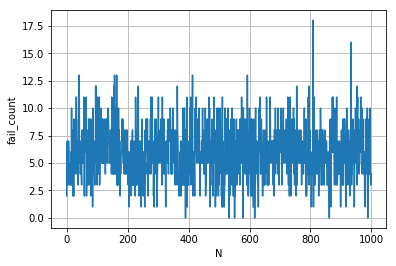

In [17]:
N, fails = monte_carlo(1000, 1000, p_100)

plt.plot(N, fails)
plt.xlabel('N')
plt.ylabel('fail_count')
plt.grid(True)

Среди тысячи проведенных независимых испытаний  по 1000 матчей в каждом, на графике видно, что максимальное количество не состоявшихся матчей составляет 14 из 1000, что меньше 2% от количества проведенных матчей. Следовательно, ламы с вероятностью выхода из строя 0.001 достаточно надежны для проведения 2-х часового матча

In [18]:
# Найдем вероятность 20 сорванных матчей из 1000, используя биномиальное распределение
l = 1000
k = 20
C = math.factorial(l)/(math.factorial(l - k) * math.factorial(k))
value = C * p_100**k * (1 - p_100)**(l - k)
value

3.093296860369112e-06

вероятность того, что будет сорван  2% матчей  близка к 0

#### Усложнение 1
Какие лампы (с каким максимальным параметром Р) необходимо купить, чтобы можно было проводить подряд несколько игр на протяжении 10 часов без выключения мачт?

In [19]:
p_100_10 = p_100 * 5 #вероятность выхода из строя 100 ламп при 10 часовом матче
density_p = np.linspace(0, p_100_10, 1000) # строим плотность вероятностей до текущего значения
fails = [] # сюда записываем количество сорванных матчей при проведении 1000 матчей в зависимости от вероятности p

for p in density_p:
    N, count = monte_carlo(100, 1000, p)
    avg = sum(count) / len(count) 
    fails.append(avg)



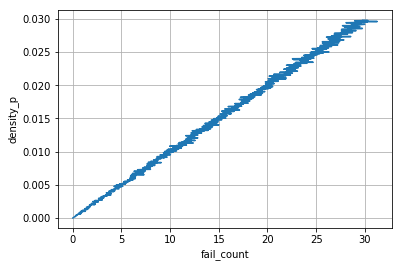

In [20]:
# построим график зависимости количества несостоявшихся 10 часовых матчей из 1000 в зависимости от вероятности
plt.plot(fails, density_p)
plt.xlabel('fail_count')
plt.ylabel('density_p')
plt.grid(True)

На графике видно, что при уровне надежности 20 сорванных 10 часовых матчей из 1000  макисмальная вероятность p примерно равна 0.018

In [21]:
true_p = 0.018 / 5 # вероятность того, что выйдут 100 ламп в 2-х часовом матче